In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [32]:
df = pd.read_csv("train_and_test2.csv")
total_registros= len(df)
ultimos_10_registros=df.tail(10)
print("Los últimos 10 registros son:")
print(ultimos_10_registros)
#df.head()

Los últimos 10 registros son:
      Passengerid   Age      Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
1299         1300  28.0    7.7208    1      0     0       0       0       0   
1300         1301   3.0   13.7750    1      1     0       0       0       0   
1301         1302  28.0    7.7500    1      0     0       0       0       0   
1302         1303  37.0   90.0000    1      1     0       0       0       0   
1303         1304  28.0    7.7750    1      0     0       0       0       0   
1304         1305  28.0    8.0500    0      0     0       0       0       0   
1305         1306  39.0  108.9000    1      0     0       0       0       0   
1306         1307  38.5    7.2500    0      0     0       0       0       0   
1307         1308  28.0    8.0500    0      0     0       0       0       0   
1308         1309  28.0   22.3583    0      1     0       0       0       0   

      zero.4  ...  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  \
1299       0  ...        0

In [39]:
total_registros= len(df)
print("El data frame tiene un total de:", total_registros, "registros")

El data frame tiene un total de: 1309 registros


In [37]:
df.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

In [9]:
df.fillna(method='ffill',inplace= True)

In [10]:
df.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       0
zero.17        0
zero.18        0
2urvived       0
dtype: int64

In [11]:
def forward_selection(X_train, X_test, y_train, y_test, model):
    selected_features = []
    remaining_features = list(X_train.columns)
    
    while remaining_features:
        best_feature = None
        best_score = 0
        
        for feature in remaining_features:
            temp_features = selected_features + [feature]
            model.fit(X_train[temp_features], y_train)
            score = model.score(X_test[temp_features], y_test)
            
            if score > best_score:
                best_score = score
                best_feature = feature
        
        if best_feature:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break
    #print(selected_features)
    return selected_features

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [13]:
#X = df[['Age','Fare','Sex','sibsp','Pclass','Embarked']]
X = df.drop('2urvived',axis=1)
y = df['2urvived']
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_x, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
selected_features_forward = forward_selection(X_train, X_test, y_train, y_test, model)

In [14]:
X_train.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18
772,0.590214,0.711888,0.020495,1.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0
543,0.415138,0.398722,0.050749,0.0,0.125,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0
289,0.220948,0.273456,0.015127,1.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.0,0.0
10,0.007645,0.047977,0.032596,1.0,0.125,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
147,0.112385,0.110610,0.067096,1.0,0.250,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [15]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [16]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1],
      dtype=int64)

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
cm = confusion_matrix(y_test,y_pred)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

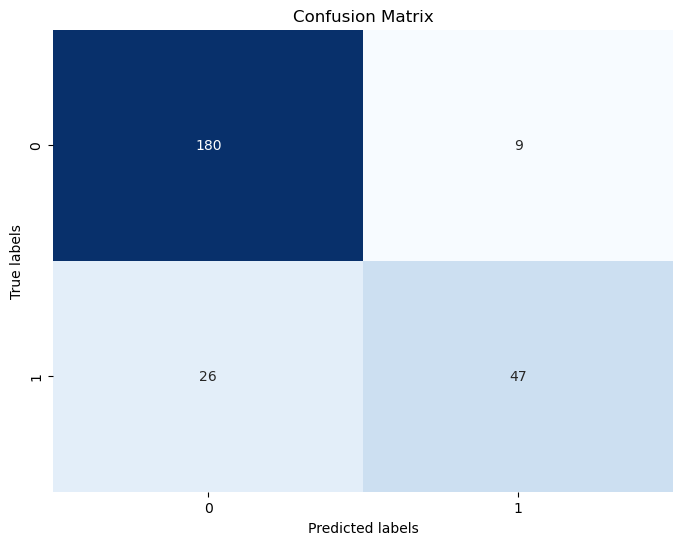

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [22]:
print(f'Precision Score : {precision_score(y_test,y_pred)}')
print(f'Recall Score : {precision_score(y_test,y_pred)}')
print(f'F1 Score : {precision_score(y_test,y_pred)}')      

Precision Score : 0.8392857142857143
Recall Score : 0.8392857142857143
F1 Score : 0.8392857142857143


In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [25]:
auroc = roc_auc_score(y_test, y_pred)

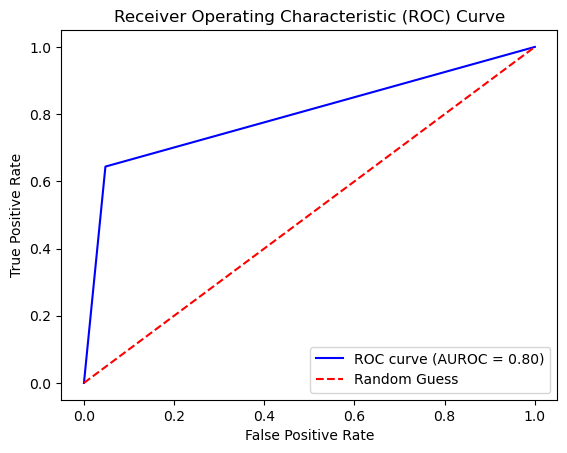

In [26]:
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUROC = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [27]:
#Luego de ejecutar todo el algoritmo, divida los datos de entrenamiento y prueba en 50% y 50%, 
#e indique si las métricas precision_score, recall_score, y  f1_score mejoraron. 
#Nota: En el código entregado debe estar como lo hizo o lo calculó.
# Importar librerías
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Dividir los datos en 50% para entrenamiento y 50% para prueba
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(scaled_df, y, test_size=0.5, random_state=42)

# Entrenar el modelo con los nuevos datos de entrenamiento
model.fit(X_train_new, y_train_new)

# Realizar predicciones en los nuevos datos de prueba
y_pred_new = model.predict(X_test_new)

# Calcular métricas con los nuevos datos
precision_new = precision_score(y_test_new, y_pred_new)
recall_new = recall_score(y_test_new, y_pred_new)
f1_new = f1_score(y_test_new, y_pred_new)

# Comparar métricas anteriores y nuevas
print("Métricas anteriores:")
print(f'Precision Score : {precision_score(y_test,y_pred)}')
print(f'Recall Score : {recall_score(y_test,y_pred)}')
print(f'F1 Score : {f1_score(y_test,y_pred)}')

print("\nMétricas nuevas:")
print(f'Precision Score : {precision_new}')
print(f'Recall Score : {recall_new}')
print(f'F1 Score : {f1_new}')


Métricas anteriores:
Precision Score : 0.8392857142857143
Recall Score : 0.6438356164383562
F1 Score : 0.7286821705426357

Métricas nuevas:
Precision Score : 0.7591240875912408
Recall Score : 0.5875706214689266
F1 Score : 0.6624203821656052


In [28]:
#Luego de ejecutar todo el algoritmo, divida los datos de entrenamiento y prueba en 90% y 10% respectivamente, 
#e indique si las métricas precision_score, recall_score, y  f1_score mejoraron. Nota: En el código entregado 
#debe estar como lo hizo o lo calculó.

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(scaled_df, y, test_size=0.1, random_state=42)

# Entrenar el modelo con los nuevos datos de entrenamiento
model.fit(X_train_new, y_train_new)

# Realizar predicciones en los nuevos datos de prueba
y_pred_new = model.predict(X_test_new)

# Calcular métricas con los nuevos datos
precision_new = precision_score(y_test_new, y_pred_new)
recall_new = recall_score(y_test_new, y_pred_new)
f1_new = f1_score(y_test_new, y_pred_new)

# Comparar métricas anteriores y nuevas
print("Métricas anteriores:")
print(f'Precision Score : {precision_score(y_test,y_pred)}')
print(f'Recall Score : {recall_score(y_test,y_pred)}')
print(f'F1 Score : {f1_score(y_test,y_pred)}')

print("\nMétricas nuevas:")
print(f'Precision Score : {precision_new}')
print(f'Recall Score : {recall_new}')
print(f'F1 Score : {f1_new}')

Métricas anteriores:
Precision Score : 0.8392857142857143
Recall Score : 0.6438356164383562
F1 Score : 0.7286821705426357

Métricas nuevas:
Precision Score : 0.9259259259259259
Recall Score : 0.5952380952380952
F1 Score : 0.7246376811594204


In [29]:
#Luego de ejecutar todo el algoritmo, divida los datos de entrenamiento y prueba en 70% y 30% respectivamente, 
#e indique si las métricas precision_score, recall_score, y  f1_score mejoraron. Nota: En el código entregado debe 
#estar como lo hizo o lo calculó.

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(scaled_df, y, test_size=0.3, random_state=42)

# Entrenar el modelo con los nuevos datos de entrenamiento
model.fit(X_train_new, y_train_new)

# Realizar predicciones en los nuevos datos de prueba
y_pred_new = model.predict(X_test_new)

# Calcular métricas con los nuevos datos
precision_new = precision_score(y_test_new, y_pred_new)
recall_new = recall_score(y_test_new, y_pred_new)
f1_new = f1_score(y_test_new, y_pred_new)

# Comparar métricas anteriores y nuevas
print("Métricas anteriores:")
print(f'Precision Score : {precision_score(y_test,y_pred)}')
print(f'Recall Score : {recall_score(y_test,y_pred)}')
print(f'F1 Score : {f1_score(y_test,y_pred)}')

print("\nMétricas nuevas:")
print(f'Precision Score : {precision_new}')
print(f'Recall Score : {recall_new}')
print(f'F1 Score : {f1_new}')


Métricas anteriores:
Precision Score : 0.8392857142857143
Recall Score : 0.6438356164383562
F1 Score : 0.7286821705426357

Métricas nuevas:
Precision Score : 0.8378378378378378
Recall Score : 0.5740740740740741
F1 Score : 0.6813186813186813


In [30]:
# Crear un nuevo modelo de regresión logística con 100 iteraciones
model = LogisticRegression(max_iter=100)

# Entrenar el modelo con los nuevos datos de entrenamiento
model.fit(X_train_new, y_train_new)

# Realizar predicciones en los nuevos datos de prueba
y_pred_new = model.predict(X_test_new)

# Calcular métricas con los nuevos datos
precision_new = precision_score(y_test_new, y_pred_new)
recall_new = recall_score(y_test_new, y_pred_new)
f1_new = f1_score(y_test_new, y_pred_new)

# Comparar métricas anteriores y nuevas
print("Métricas anteriores:")
print(f'Precision Score : {precision_score(y_test,y_pred)}')
print(f'Recall Score : {recall_score(y_test,y_pred)}')
print(f'F1 Score : {f1_score(y_test,y_pred)}')

print("\nMétricas nuevas:")
print(f'Precision Score : {precision_new}')
print(f'Recall Score : {recall_new}')
print(f'F1 Score : {f1_new}')


Métricas anteriores:
Precision Score : 0.8392857142857143
Recall Score : 0.6438356164383562
F1 Score : 0.7286821705426357

Métricas nuevas:
Precision Score : 0.8378378378378378
Recall Score : 0.5740740740740741
F1 Score : 0.6813186813186813
